In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
X, y = load_iris(return_X_y=True)

X = X[:, :2]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

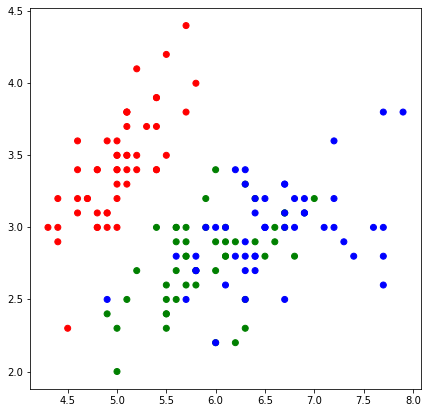

In [6]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [7]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [8]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    q = 0.5
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            distance = e_metrics(x, x_train[i])# * (q**i)
            
            test_distances.append([distance, y_train[i]])

        classes = {class_item: 0 for class_item in set(y_train)}
#Изменения
        sorted_n_n = sorted(test_distances)[0:k]
        weighted_sorted_n_n = [(d[0] *(q**sorted(test_distances)[0:k].index(d)), d[1]) for d in sorted_n_n]
        answers.append(max(weighted_sorted_n_n)[1])
#Изменения

    return answers

Распишу что изменил, для понимания:

    sorted_n_n => Отсортированный список близжайших соседей
    
    weighted_sorted_n_n => тот же список только дистанции домножил на вес, а вес = q ** (порядковый номер соседа)
    
    answers в ответ идет класс, который имеет больший вес.
    
Как я предположил, что в ситуации, когда k=5 и один сосед 1-го класса, а четыре соседа 2-го класса, если у единственного соседа 1-го класса вес больше, т.е он ближе, то тестовый объект мы должны отнести к 1-му классу.

Но была еще мысль суммировать веса других четырех объектов и уже сумму сравнивать с весом объекта первого класса. При визуализации такой подход, чисто логически, показался некорректным.

In [9]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [10]:
k = 2

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 2: 0.733


Построим график распределения классов.

In [11]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

(2352, 2)


<ipython-input-11-149519eff5db>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


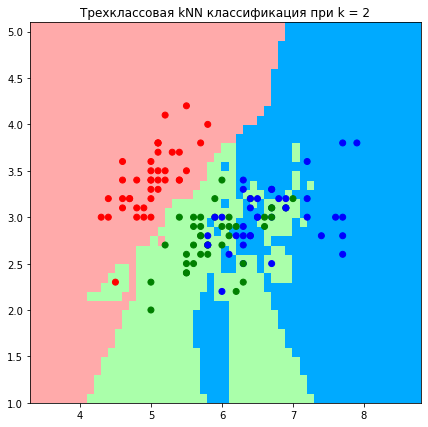

Wall time: 2.36 s


In [12]:
%%time
get_graph(X_train, y_train, k)

Точность алгоритма при k = 3: 0.700
(2352, 2)


<ipython-input-11-149519eff5db>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


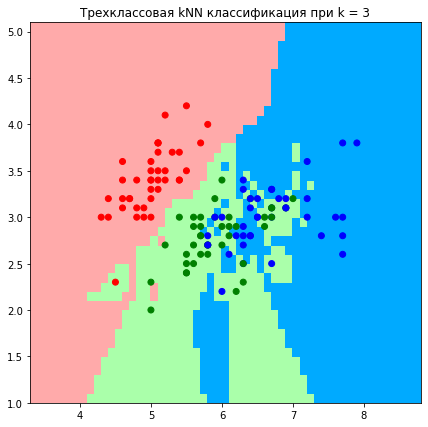

In [13]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 3: 0.700
(2352, 2)


<ipython-input-11-149519eff5db>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


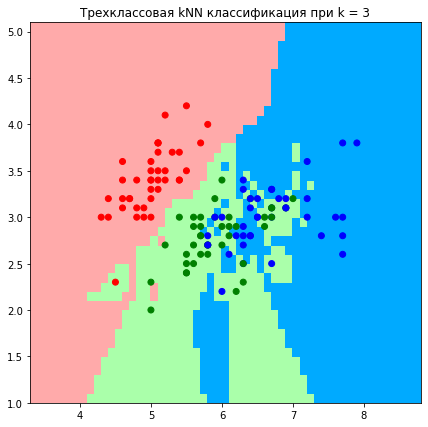

In [14]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 5: 0.700
(2352, 2)


<ipython-input-11-149519eff5db>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


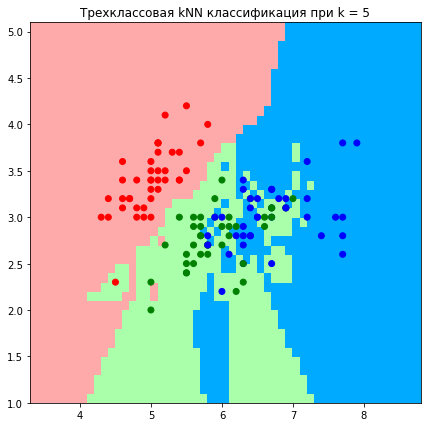

In [15]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

Метрики получились почти такие же, но при увеличении k чуть хуже. Но в целом модель работает приемлемо